<a href="https://colab.research.google.com/github/Ramyanee/model_saving_colab/blob/master/spam_detection_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
pip install -q pyyaml h5py  # Required to save models in HDF5 format


In [11]:
import os

import tensorflow as tf
from tensorflow import keras

print(tf.version.VERSION)

2.2.0


In [0]:
checkpoint_path = "training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split as tts

In [14]:
!wget https://lazyprogrammer.me/course_files/spam.csv

--2020-05-14 08:50:32--  https://lazyprogrammer.me/course_files/spam.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.31.81.48, 104.31.80.48, 2606:4700:3037::681f:5030, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.31.81.48|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 503663 (492K) [text/csv]
Saving to: ‘spam.csv’

spam.csv            100%[===================>] 491.86K  --.-KB/s    in 0.01s   

2020-05-14 08:50:32 (36.2 MB/s) - ‘spam.csv’ saved [503663/503663]



In [0]:
df = pd.read_csv("spam.csv", encoding = 'ISO-8859-1')

In [16]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [0]:
df = df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)

In [18]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [0]:
df.columns = ['labels','data']

In [20]:
df.head()

,labels,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [21]:
df.b_labels = df.labels.map({'ham':0,'spam':1})

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [22]:
df.b_labels

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: labels, Length: 5572, dtype: int64

In [0]:
Y = df.b_labels.values

In [0]:
df_train, df_test, ytrain, ytest = tts(df.data,Y, test_size = 0.33)

In [0]:
from tensorflow.keras.preprocessing.text import Tokenizer as tk

In [0]:
MAX_VOCAB = 20000
tknzr = tk(num_words = MAX_VOCAB)
tknzr.fit_on_texts(df_train)
sq_train = tknzr.texts_to_sequences(df_train)
sq_test = tknzr.texts_to_sequences(df_test)

In [0]:
w2i = tknzr.word_index

In [0]:
V = len(w2i)

In [29]:
V

7234

In [0]:
from tensorflow.keras.preprocessing.sequence import pad_sequences as pd_sq

In [0]:
data_train = pd_sq(sq_train)

In [32]:
data_train.shape # N * T

(3733, 189)

In [0]:
T = data_train.shape[1]

In [0]:
data_test = pd_sq(sq_test, maxlen = T)

In [35]:
data_train.shape

(3733, 189)

In [0]:
#creating the model

In [0]:
from tensorflow.keras.layers import Dense, Input, GlobalMaxPooling1D, LSTM, Embedding
from tensorflow.keras.models import Model


In [0]:
#embedding dimensionality
D = 20
# hidden state dimensionality
M =15

i = Input(shape = (T,) )
x=  Embedding(V+1,D)(i)
x=LSTM(M, return_sequences=True)(x)
x=GlobalMaxPooling1D()(x)
x= Dense(1, activation='sigmoid')(x)

model = Model(i,x)

In [0]:
model.compile(
    loss= 'binary_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [40]:
r  = model.fit(
    data_train,
    ytrain,
    epochs = 10,
    validation_data = (data_test, ytest),
    callbacks=[cp_callback]

)


Epoch 1/10
117/117 [==============================] - ETA: 0s - loss: 0.4701 - accuracy: 0.8519
Epoch 00001: saving model to training_1/cp.ckpt
117/117 [==============================] - 5s 40ms/step - loss: 0.4701 - accuracy: 0.8519 - val_loss: 0.3934 - val_accuracy: 0.8662
Epoch 2/10
117/117 [==============================] - ETA: 0s - loss: 0.3940 - accuracy: 0.8658
Epoch 00002: saving model to training_1/cp.ckpt
117/117 [==============================] - 4s 36ms/step - loss: 0.3940 - accuracy: 0.8658 - val_loss: 0.3923 - val_accuracy: 0.8662
Epoch 3/10
117/117 [==============================] - ETA: 0s - loss: 0.3917 - accuracy: 0.8658
Epoch 00003: saving model to training_1/cp.ckpt
117/117 [==============================] - 4s 36ms/step - loss: 0.3917 - accuracy: 0.8658 - val_loss: 0.3881 - val_accuracy: 0.8662
Epoch 4/10
117/117 [==============================] - ETA: 0s - loss: 0.3806 - accuracy: 0.8658
Epoch 00004: saving model to training_1/cp.ckpt
117/117 [===================

In [41]:
model.evaluate(data_test, ytest)

58/58 [==============================] - 1s 12ms/step - loss: 0.0598 - accuracy: 0.9859


[0.0597555972635746, 0.9858618974685669]

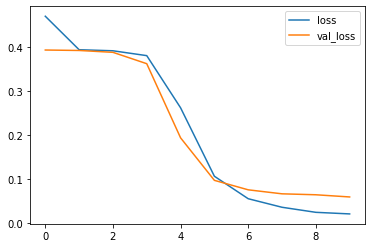

In [42]:
plt.plot(r.history['loss'], label = 'loss ')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

In [0]:
def create_model():  
  #embedding dimensionality
  D = 20
  # hidden state dimensionality
  M =15

  i = Input(shape = (T,) )
  x=  Embedding(V+1,D)(i)
  x=LSTM(M, return_sequences=True)(x)
  x=GlobalMaxPooling1D()(x)
  x= Dense(1, activation='sigmoid')(x)

  model = Model(i,x)
  model.compile(
      loss= 'binary_crossentropy',
      optimizer = 'adam',
      metrics = ['accuracy']
  )
  return model

In [54]:
model2 = create_model()
model2.evaluate(data_test, ytest)

58/58 [==============================] - 1s 12ms/step - loss: 0.6957 - accuracy: 0.2621


[0.6956961750984192, 0.2620989680290222]

In [49]:
ls {checkpoint_dir}

checkpoint                   cp.ckpt.data-00001-of-00002
cp.ckpt.data-00000-of-00002  cp.ckpt.index


In [55]:
# Loads the weights
model2.load_weights("training_1/cp.ckpt")

# Re-evaluate the model
loss,acc = model2.evaluate(data_test, ytest, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))

58/58 - 1s - loss: 0.0598 - accuracy: 0.9859
Restored model, accuracy: 98.59%


SAVING EVERY 2 EPOCH, WITH EPOCH NAME IN THE CHECKPOINTS

In [58]:
model3 = create_model()
model3.evaluate(data_test, ytest)

58/58 [==============================] - 1s 12ms/step - loss: 0.6871 - accuracy: 0.8662


[0.6870725750923157, 0.8662316203117371]

In [0]:
# Include the epoch in the file name (uses `str.format`)
checkpoint_path = "training_2/cp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights every 2 epochs
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path, 
    verbose=1, 
    save_weights_only=True,
    save_freq=2)

In [0]:
model3.save_weights(checkpoint_path.format(epoch=0))

In [65]:
r  = model3.fit(
    data_train,
    ytrain,
    epochs = 10,
    validation_data = (data_test, ytest),
    callbacks=[cp_callback],
    verbose = 0

)


Epoch 00001: saving model to training_2/cp-0001.ckpt

Epoch 00001: saving model to training_2/cp-0001.ckpt

Epoch 00001: saving model to training_2/cp-0001.ckpt

Epoch 00001: saving model to training_2/cp-0001.ckpt

Epoch 00001: saving model to training_2/cp-0001.ckpt

Epoch 00001: saving model to training_2/cp-0001.ckpt

Epoch 00001: saving model to training_2/cp-0001.ckpt

Epoch 00001: saving model to training_2/cp-0001.ckpt

Epoch 00001: saving model to training_2/cp-0001.ckpt

Epoch 00001: saving model to training_2/cp-0001.ckpt

Epoch 00001: saving model to training_2/cp-0001.ckpt

Epoch 00001: saving model to training_2/cp-0001.ckpt

Epoch 00001: saving model to training_2/cp-0001.ckpt

Epoch 00001: saving model to training_2/cp-0001.ckpt

Epoch 00001: saving model to training_2/cp-0001.ckpt

Epoch 00001: saving model to training_2/cp-0001.ckpt

Epoch 00001: saving model to training_2/cp-0001.ckpt

Epoch 00001: saving model to training_2/cp-0001.ckpt

Epoch 00001: saving model t

In [66]:
ls {checkpoint_dir}

checkpoint                        cp-0005.ckpt.data-00001-of-00002
cp-0000.ckpt.data-00000-of-00002  cp-0005.ckpt.index
cp-0000.ckpt.data-00001-of-00002  cp-0006.ckpt.data-00000-of-00002
cp-0000.ckpt.index                cp-0006.ckpt.data-00001-of-00002
cp-0001.ckpt.data-00000-of-00002  cp-0006.ckpt.index
cp-0001.ckpt.data-00001-of-00002  cp-0007.ckpt.data-00000-of-00002
cp-0001.ckpt.index                cp-0007.ckpt.data-00001-of-00002
cp-0002.ckpt.data-00000-of-00002  cp-0007.ckpt.index
cp-0002.ckpt.data-00001-of-00002  cp-0008.ckpt.data-00000-of-00002
cp-0002.ckpt.index                cp-0008.ckpt.data-00001-of-00002
cp-0003.ckpt.data-00000-of-00002  cp-0008.ckpt.index
cp-0003.ckpt.data-00001-of-00002  cp-0009.ckpt.data-00000-of-00002
cp-0003.ckpt.index                cp-0009.ckpt.data-00001-of-00002
cp-0004.ckpt.data-00000-of-00002  cp-0009.ckpt.index
cp-0004.ckpt.data-00001-of-00002  cp-0010.ckpt.data-00000-of-00002
cp-0004.ckpt.index                cp-0010.ckpt.data-00001-of-0000

In [67]:
latest = tf.train.latest_checkpoint(checkpoint_dir)
latest

'training_2/cp-0010.ckpt'

In [0]:
model_3 = create_model()

In [69]:
model_3.load_weights(latest)

In [72]:
model_3.evaluate(data_test,ytest)

58/58 [==============================] - 1s 12ms/step - loss: 0.0846 - accuracy: 0.9734


[0.08455293625593185, 0.9733550548553467]